# Data Visualization Project - Understanding Relationship between a Country's GDP and the life expectancy of that country's citizens

In [1]:
#import necessary libraries for data visiualizations and data exploration
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
#Linear regression library
import statsmodels.api as sm 

In [2]:
#Load csv into a DataFrame
df = pd.read_csv('all_data.csv')

#Initiate exploratory analysis, understanding the ranges and numbner of countries in the DataFrame
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


*Seems that the column data types correspond with what is expected, Life expectancy and GPD are continuous numerical variables and Country is a nominal categorical variable. No null values to worry about*

In [4]:
#Let's see what countries are in the dataset
df['Country'].value_counts(normalize=True)

Country
Chile                       0.166667
China                       0.166667
Germany                     0.166667
Mexico                      0.166667
United States of America    0.166667
Zimbabwe                    0.166667
Name: proportion, dtype: float64

# Let's look at a two side-by-side boxplots: One is looking at the range for GDP and the other for Life expectancy

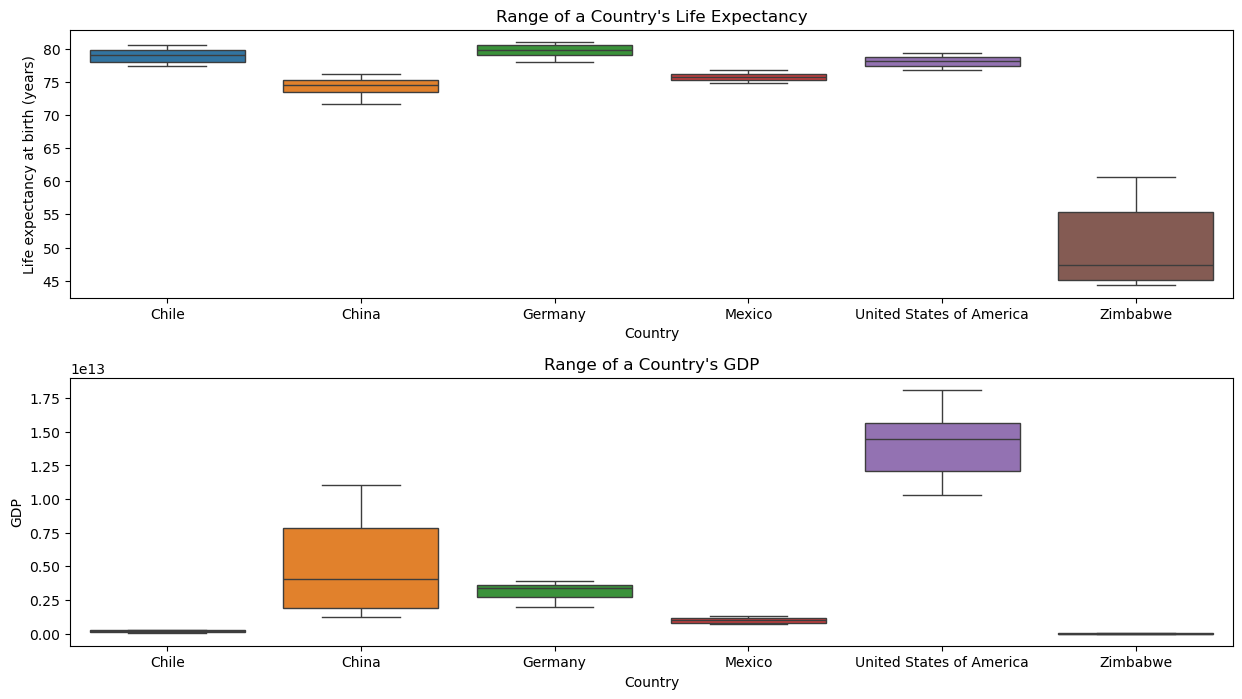

In [5]:
#let's look at a two side-by-side boxplots: one looking at the range for GDP and the other for Life expectancy
plt.figure(figsize=(15,8))

plt.subplot(2,1,1)
sns.boxplot(data = df, x='Country', y='Life expectancy at birth (years)', hue = 'Country')
plt.title("Range of a Country's Life Expectancy")

plt.subplot(2,1,2)
sns.boxplot(data = df, x='Country', y='GDP', hue = 'Country')
plt.title("Range of a Country's GDP")

plt.subplots_adjust(hspace=0.3)
plt.savefig('Ranges_Life_Exp_and_GDP_per_Country.png')
plt.show()
plt.clf()


*From the charts above, it is evident that Zimbabwe has a lower median life expectancy over the six other countries and the United States of America has had the highest GDP over the years*

# Let's now examine the distribution of Life Expectancy for each country

['China', 'Zimbabwe', 'Mexico', 'Germany', 'Chile', 'United States of America']


<Figure size 640x480 with 0 Axes>

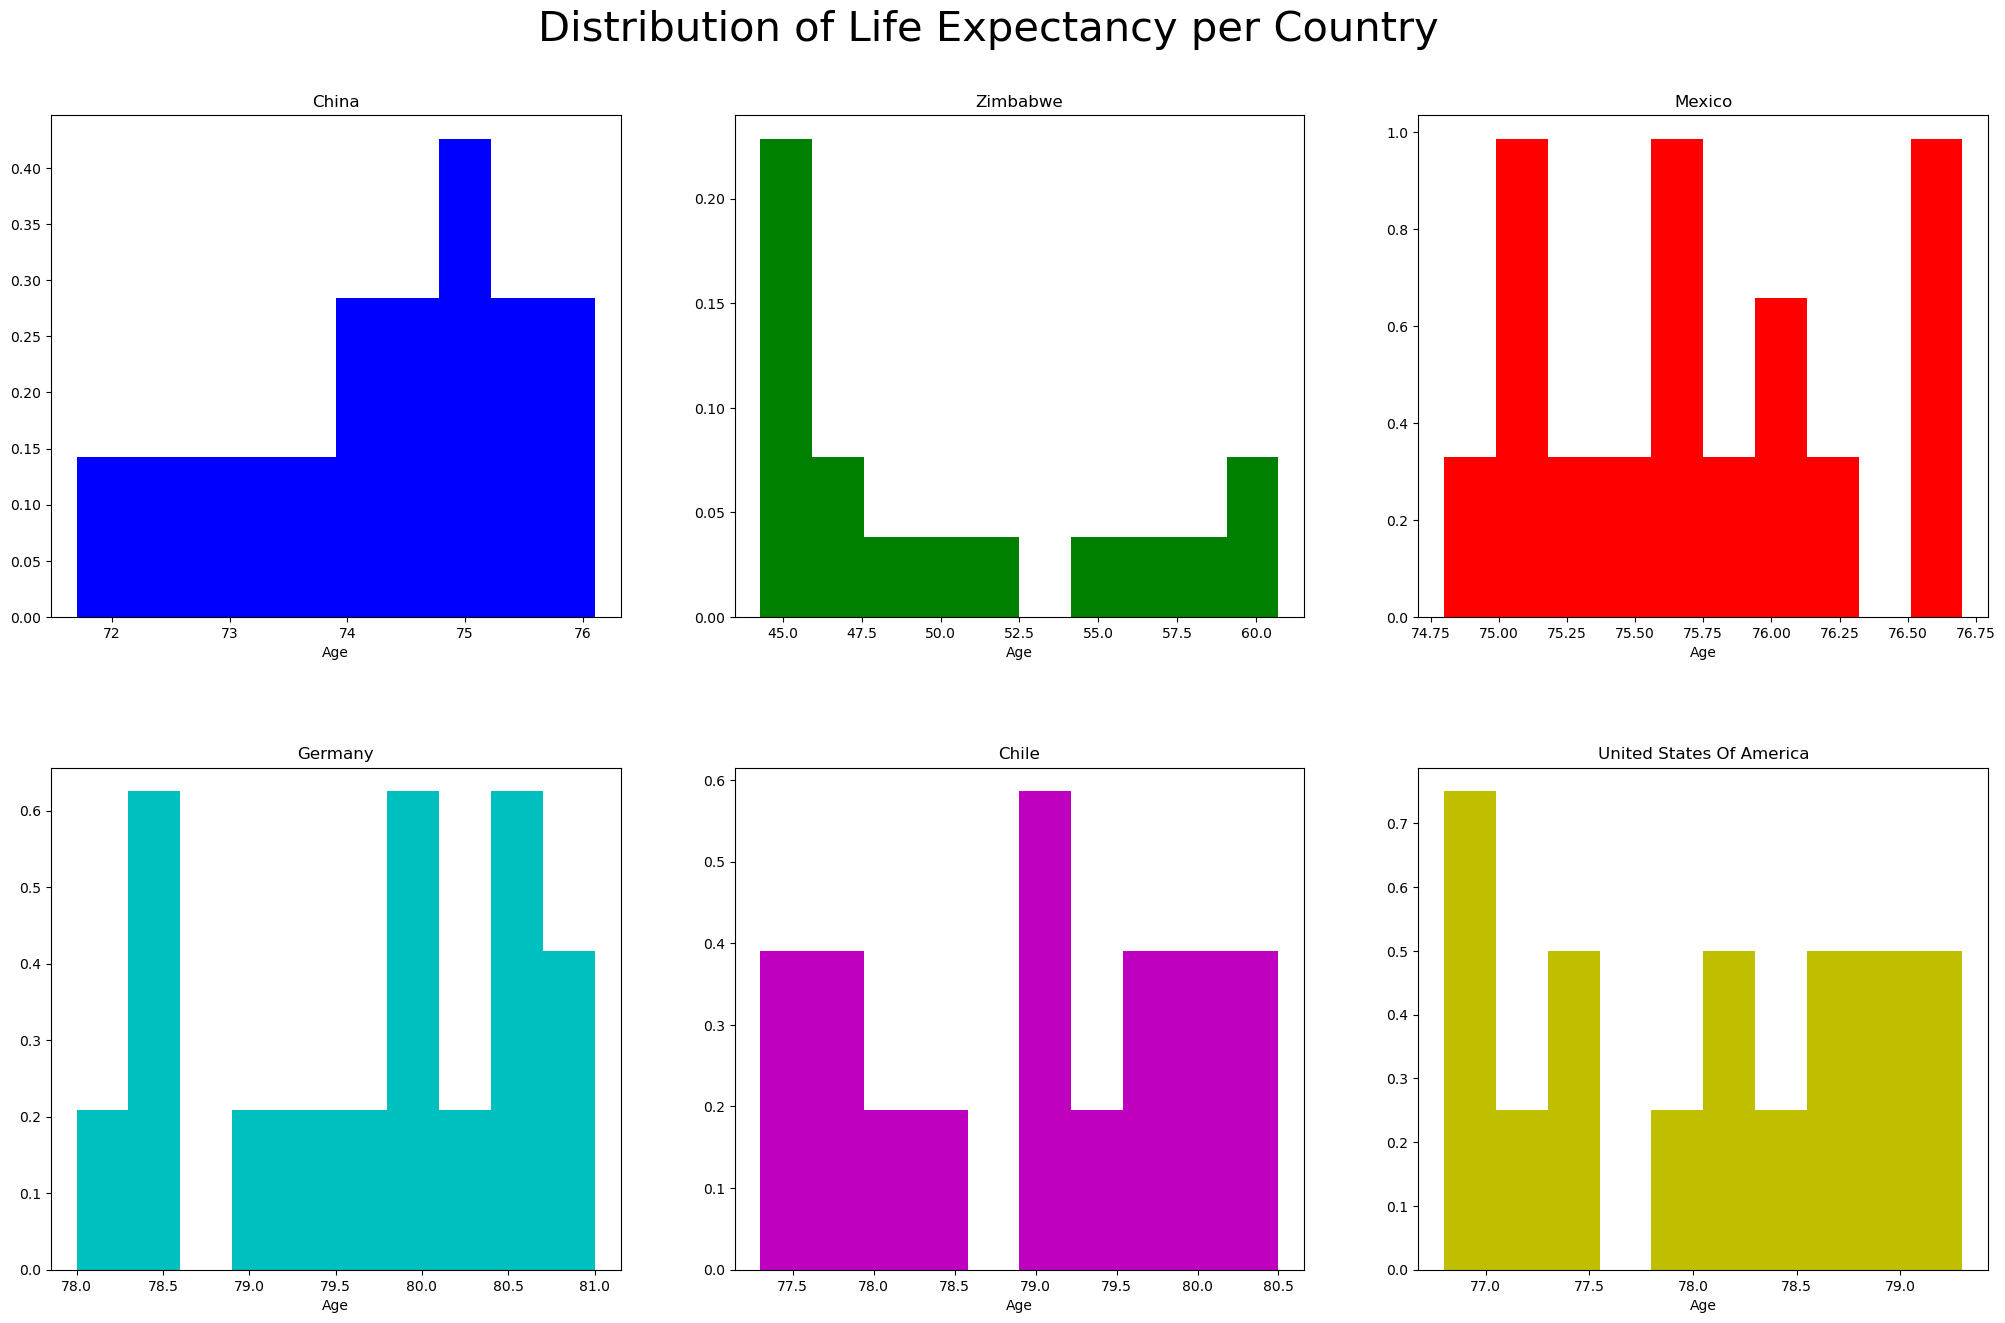

In [6]:
#Building out histograms of life expectancy for each country
list_of_countries = list(set(df['Country'].values.tolist()))
colors = ['b','g','r','c','m','y']
print(list_of_countries)

plt.figure(figsize=(25,15))
plt.subplots_adjust(hspace=0.3)
plt.suptitle("Distribution of Life Expectancy per Country", fontsize=30, y=0.95)

for i in range(1, len(list_of_countries)+1):
   ax = plt.subplot(2,3,i)
   country = list_of_countries[i-1] 
   ax = plt.hist(df["Life expectancy at birth (years)"][df['Country'] == country], bins=10, density=True, color = colors[i-1])
   plt.title(country.title())
   plt.xlabel('Age')
plt.savefig('Distribution_LE.png')
plt.show()
plt.clf() 
    

#sns.displot(df["Life expectancy at birth (years)"][df['Country'] == 'Mexico'], bins=9, kde=False)

*Now we are going to plot a time series to understand how life expectancy and GDP changed over time*

<Figure size 640x480 with 0 Axes>

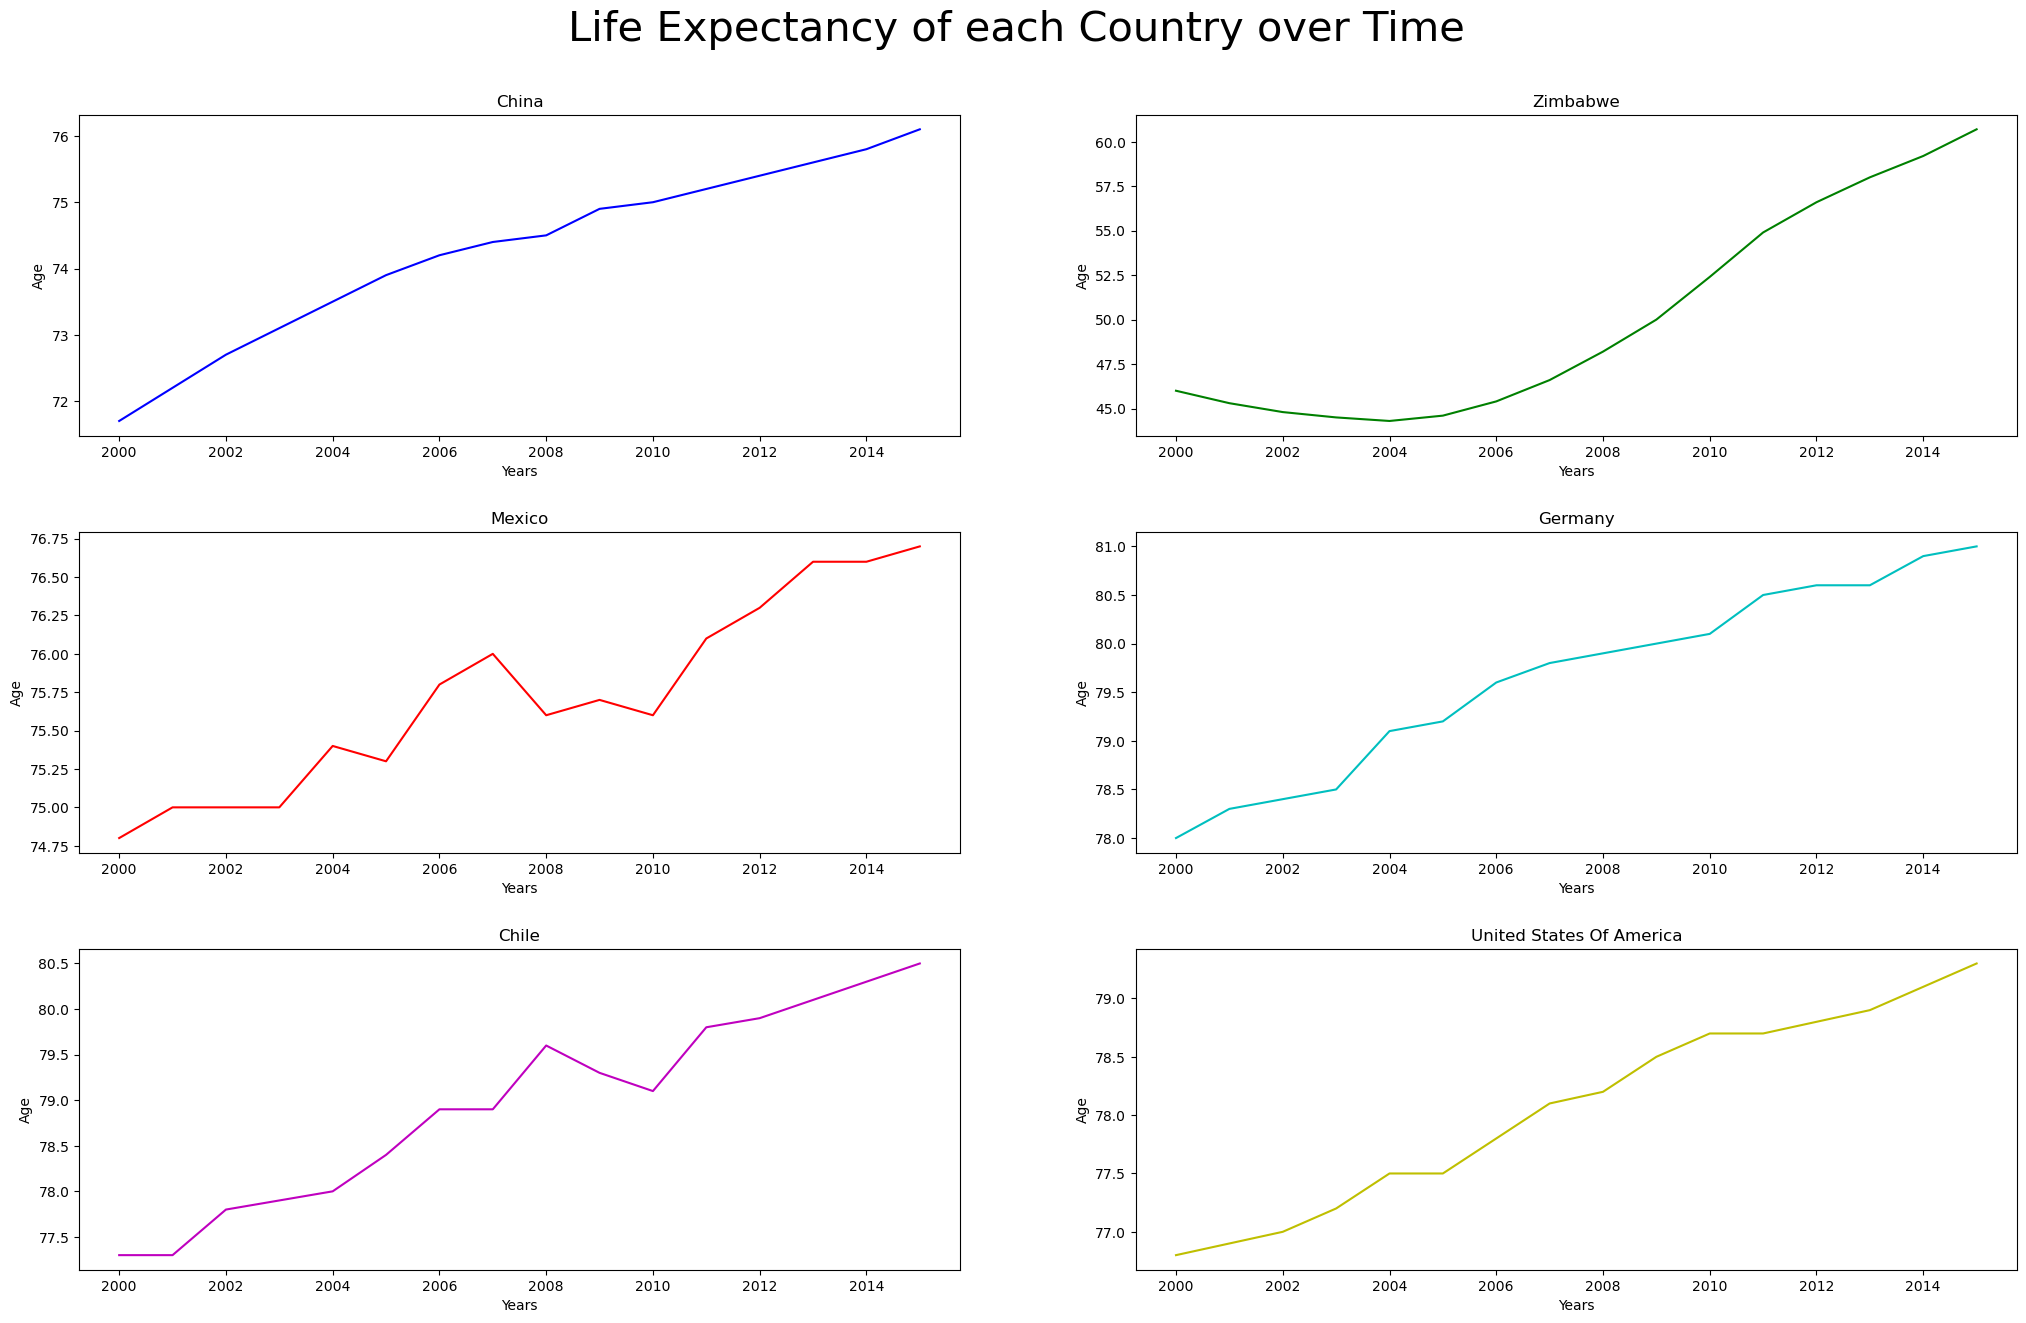

In [7]:
#First let's plot life expectancy
plt.figure(figsize=(25,15))
plt.subplots_adjust(hspace=0.3)
plt.suptitle("Life Expectancy of each Country over Time", fontsize=30, y=0.95)

for i in range(1, len(list_of_countries)+1):
   ax = plt.subplot(3,2,i)
   country = list_of_countries[i-1] 
   ax = plt.plot(df['Year'][df['Country'] == country] ,df["Life expectancy at birth (years)"][df['Country'] == country], color = colors[i-1])
   plt.title(country.title())
   plt.xlabel('Years')
   plt.ylabel('Age')  
plt.savefig('LE_over_time.png')
plt.show()
plt.clf() 



*Evidently, all countries saw a rise in life expectancy over the years*

<Figure size 640x480 with 0 Axes>

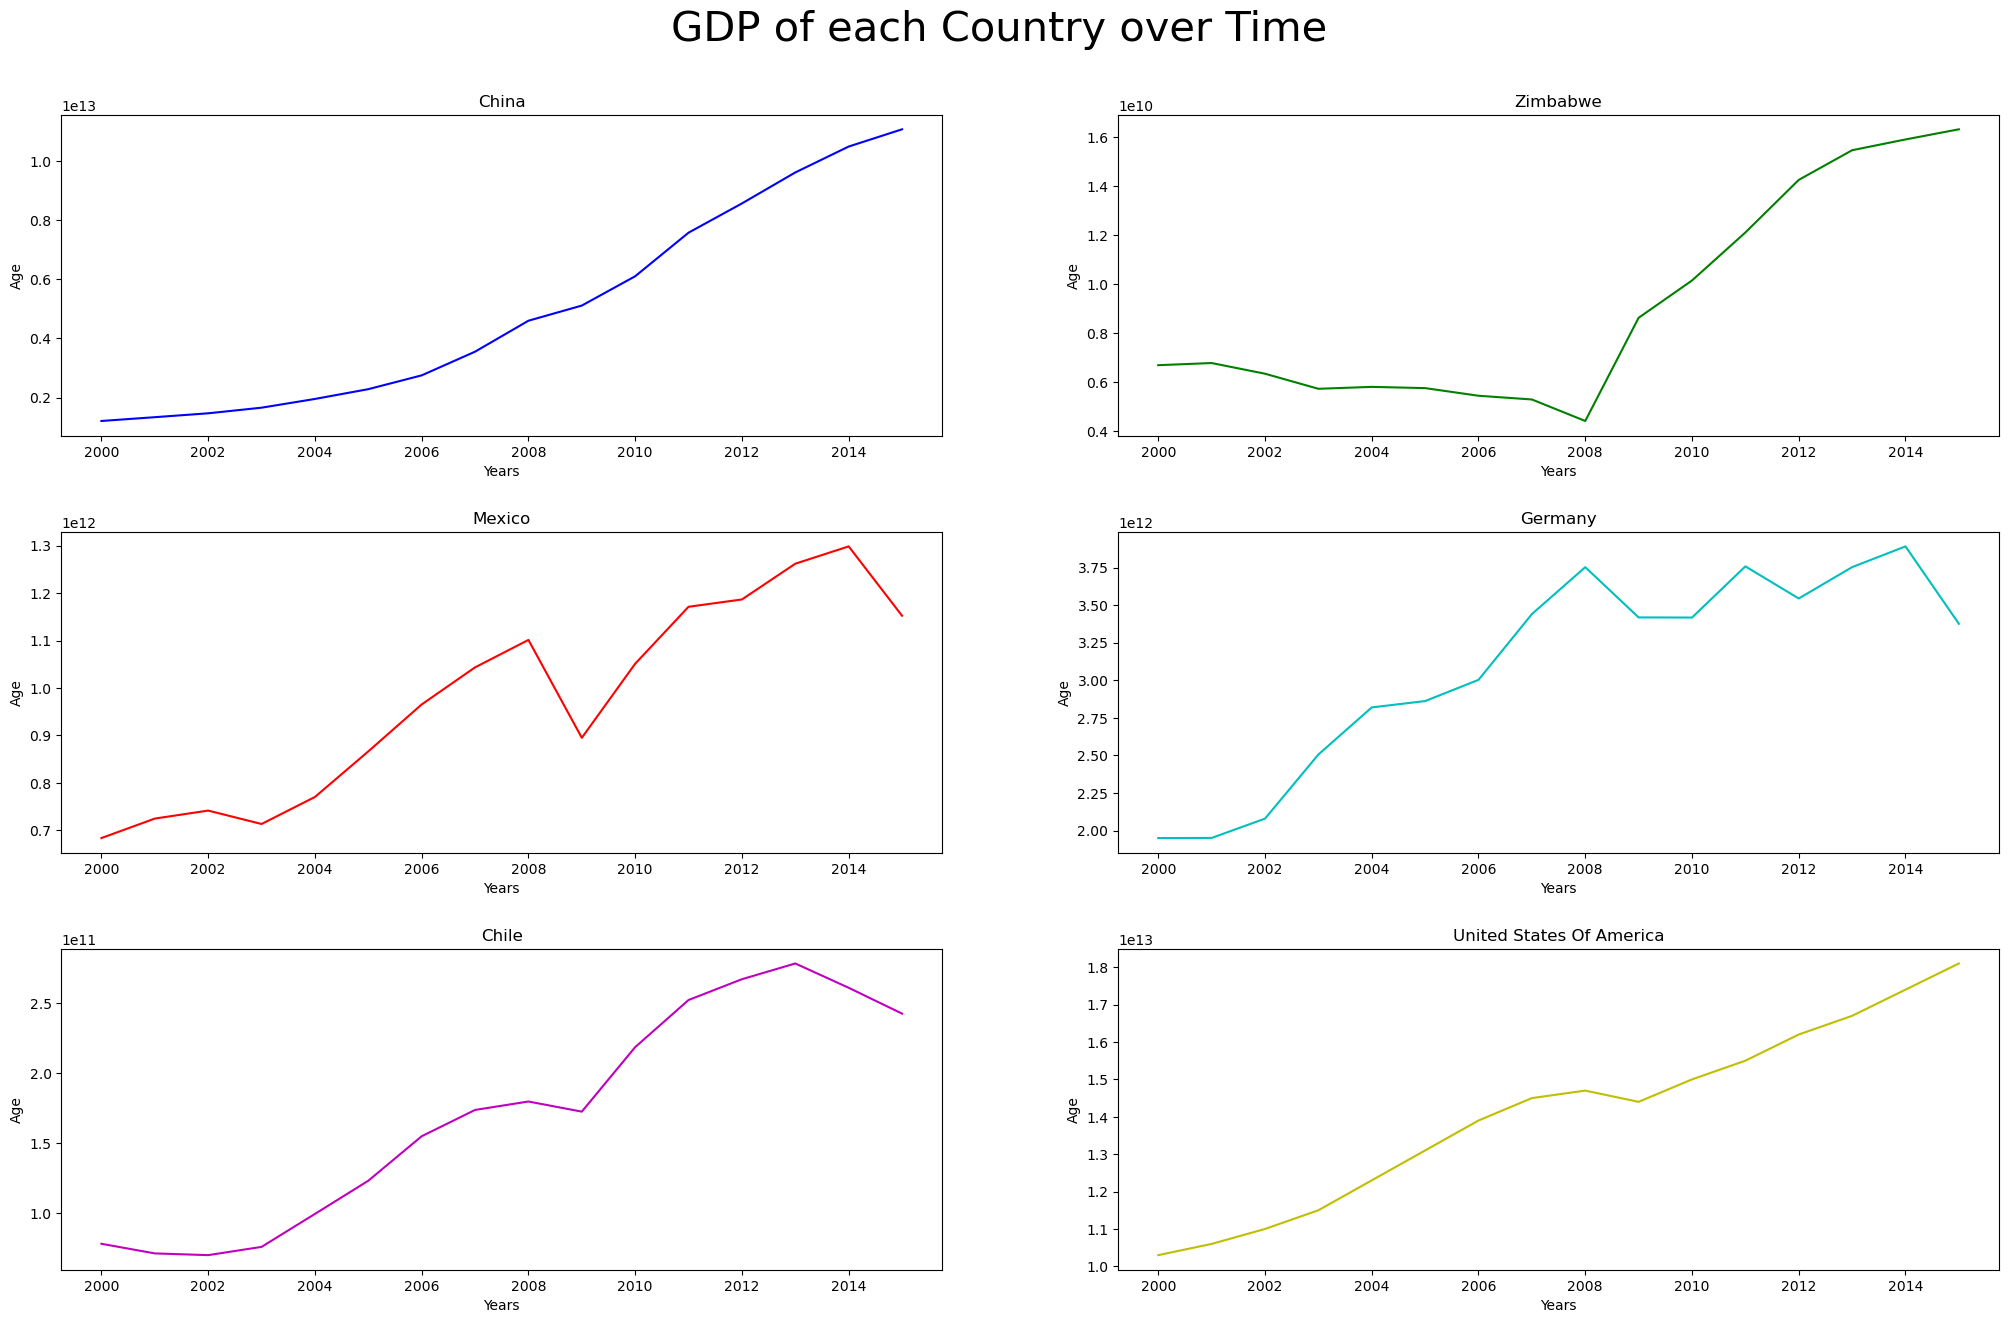

In [8]:
#First let's plot GDP
plt.figure(figsize=(25,15))
plt.subplots_adjust(hspace=0.3)
plt.suptitle("GDP of each Country over Time", fontsize=30, y=0.95)

for i in range(1, len(list_of_countries)+1):
   ax = plt.subplot(3,2,i)
   country = list_of_countries[i-1] 
   ax = plt.plot(df['Year'][df['Country'] == country] ,df["GDP"][df['Country'] == country], color = colors[i-1])
   plt.title(country.title())
   plt.xlabel('Years')
   plt.ylabel('Age')

plt.savefig('GDP_over_time.png')
plt.show()
plt.clf()

*Evidently, all countries saw a rise in GDP expectancy over the years with some bumps over the years*

# Generalizng the relationship between GDP and Life Expectancy

<Figure size 640x480 with 0 Axes>

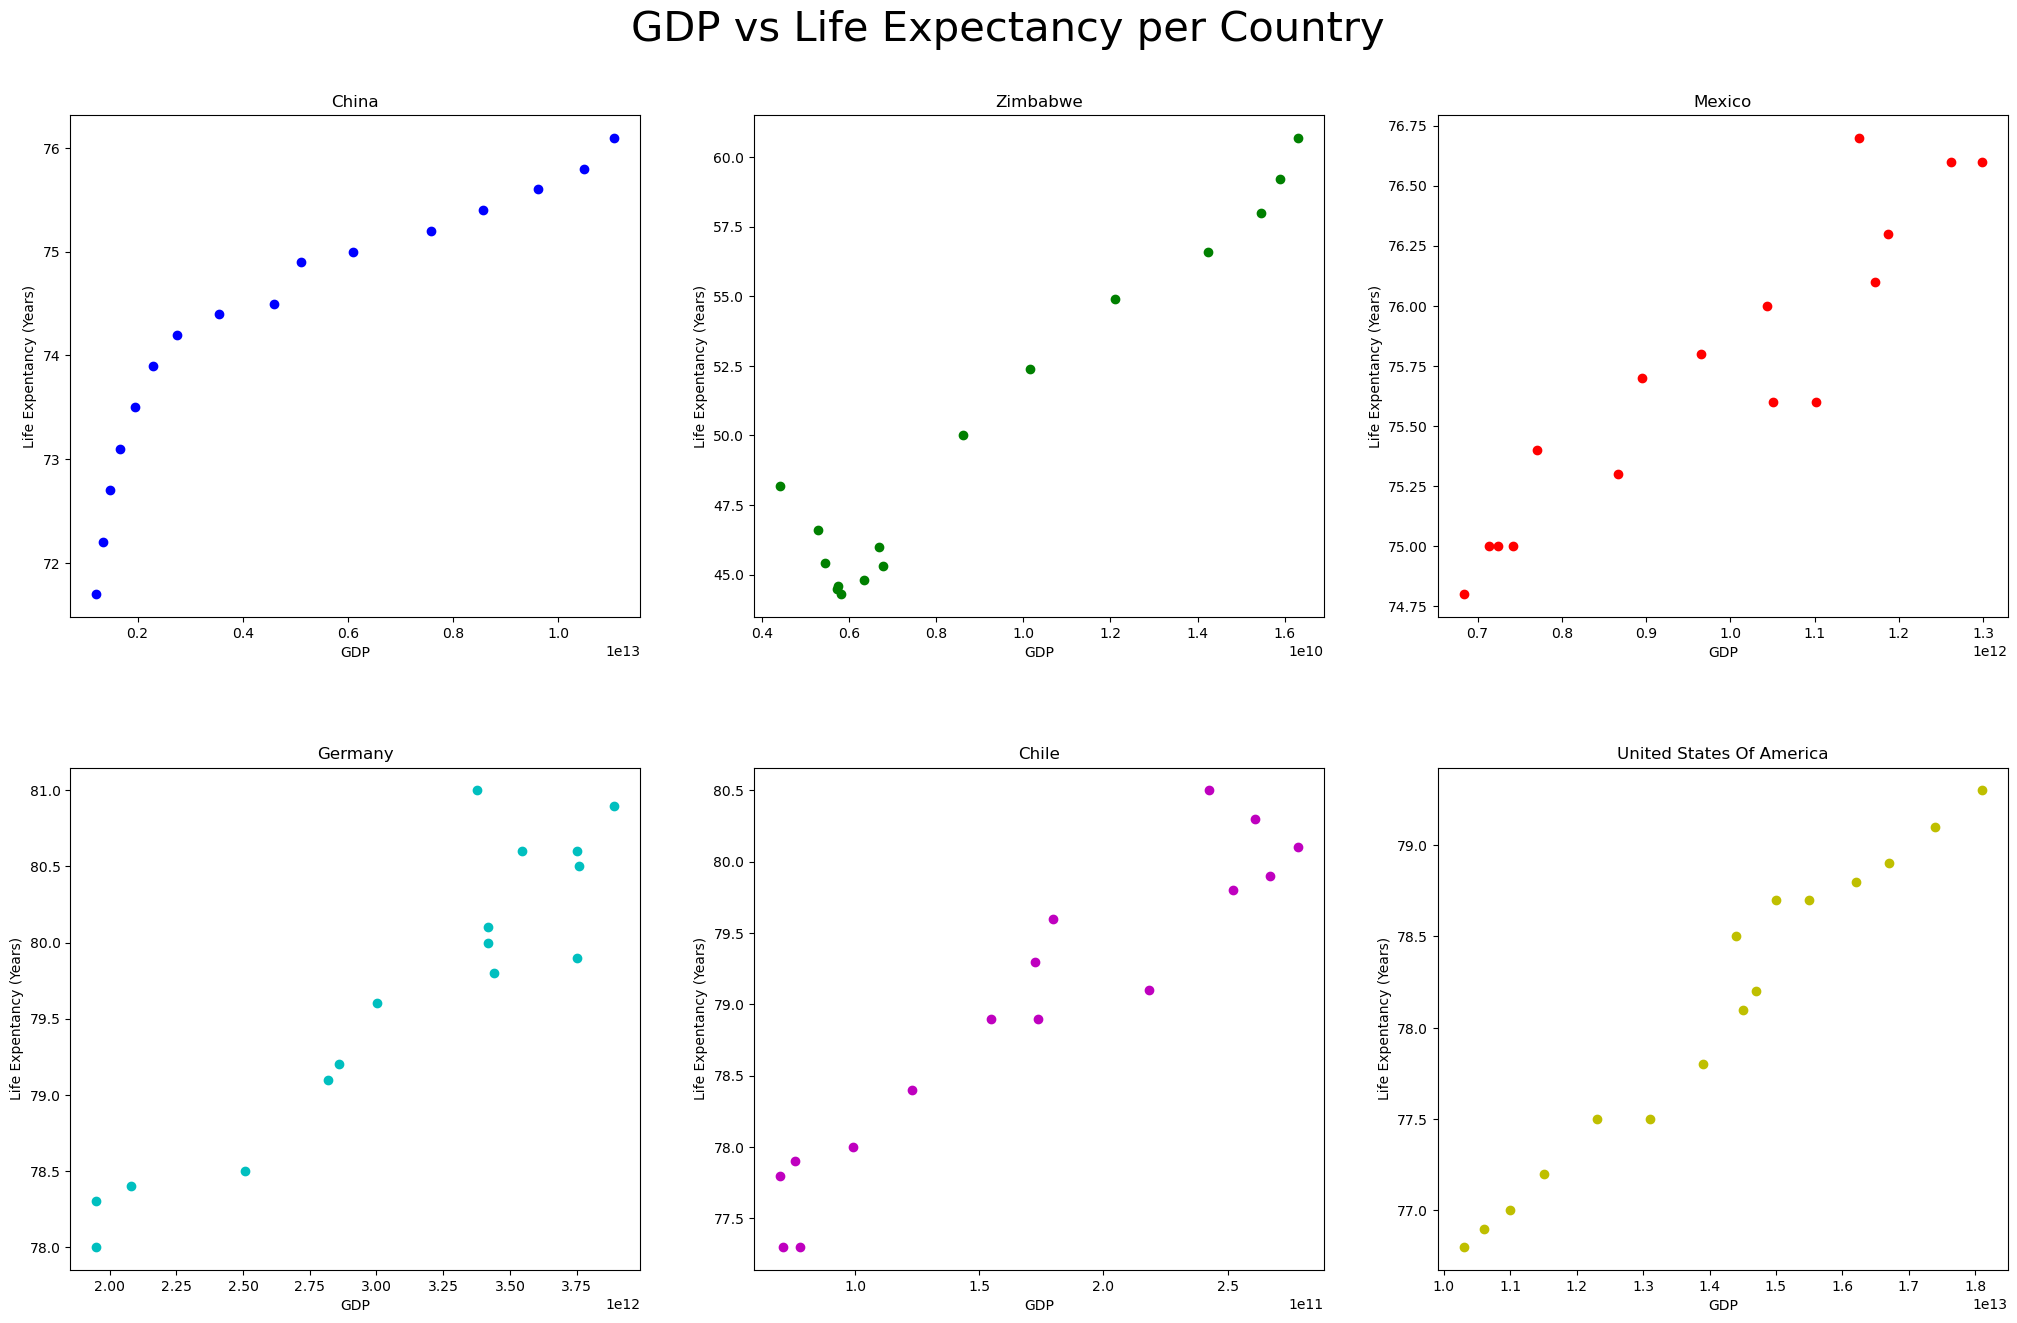

In [9]:
#Looking at the scatter plot of GPD and Life expectancy
plt.figure(figsize=(25,15))
plt.subplots_adjust(hspace=0.3)
plt.suptitle("GDP vs Life Expectancy per Country", fontsize=30, y=0.95)

for i in range(1, len(list_of_countries)+1):
   ax = plt.subplot(2,3,i)
   country = list_of_countries[i-1] 
   ax = plt.scatter(df['GDP'][df['Country'] == country] ,df["Life expectancy at birth (years)"][df['Country'] == country], color = colors[i-1])
   plt.title(country.title())
   plt.xlabel('GDP')
   plt.ylabel('Life Expentancy (Years)') 
    
plt.savefig('gdp_vs_LE.png')
plt.show()
plt.clf()

*At first glance, all countries seem to have a positive correlation and have a linear relationship, except China.*

# Testing the linear relationship between GDP and Life Expectancy for each country

*To build out a simple linear regression model for each country we will test for the following:*
- Linear relationship: We took a look at the scatterplots above, seems all countries except for China meet this requirement
- Homoscedasticity: For each value of GDP, the distribution of residuals has the same variance. We test this by plotting the scatterplot of fitted values vs residuals.
- Normally distributed residuals: We will plot the distribution of residuals for each country

In [10]:
df = df.rename(columns = {'Life expectancy at birth (years)': 'Life'})
print(df[df['Country'] == country].head())

                     Country  Year  Life           GDP
64  United States of America  2000  76.8  1.030000e+13
65  United States of America  2001  76.9  1.060000e+13
66  United States of America  2002  77.0  1.100000e+13
67  United States of America  2003  77.2  1.150000e+13
68  United States of America  2004  77.5  1.230000e+13


<Figure size 640x480 with 0 Axes>

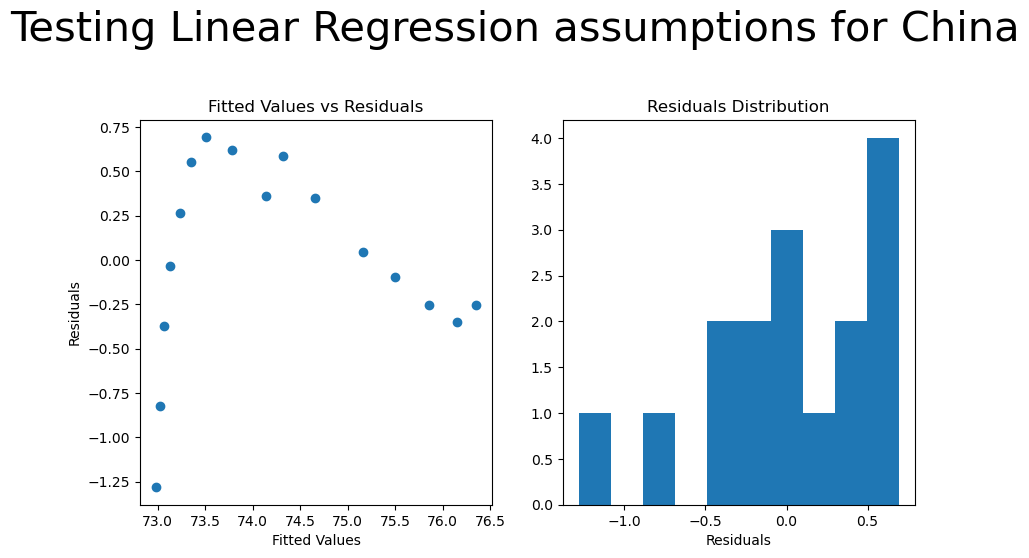

The R squared value for China is 0.8254186584037408. We see that as GDP increases 1 unit per year, life expectancy will increase by 3.4202188071268063e-13.


<Figure size 640x480 with 0 Axes>

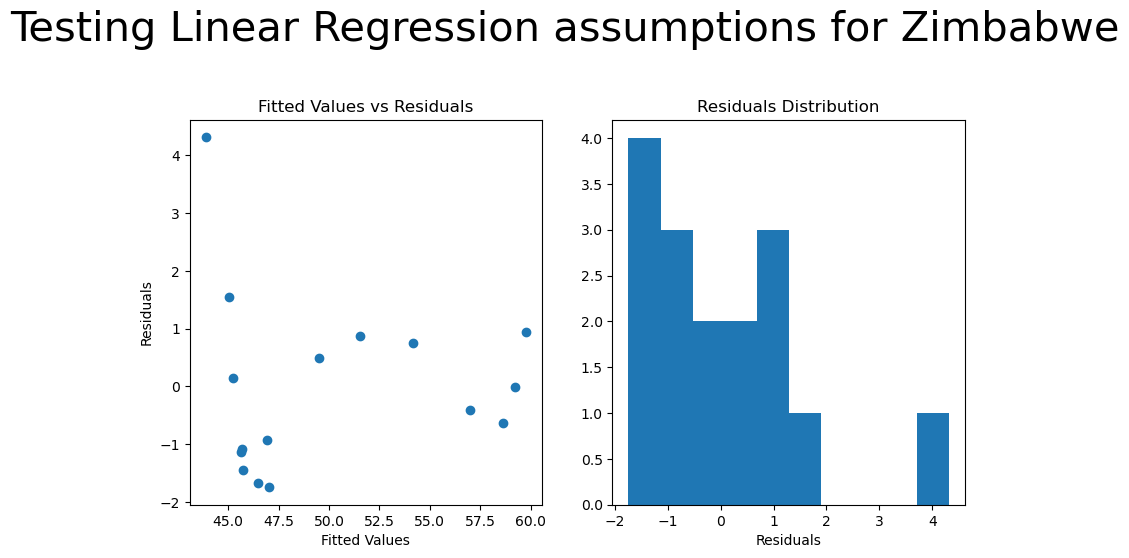

The R squared value for Zimbabwe is 0.933542238230161. We see that as GDP increases 1 unit per year, life expectancy will increase by 1.3352988082268312e-09.


<Figure size 640x480 with 0 Axes>

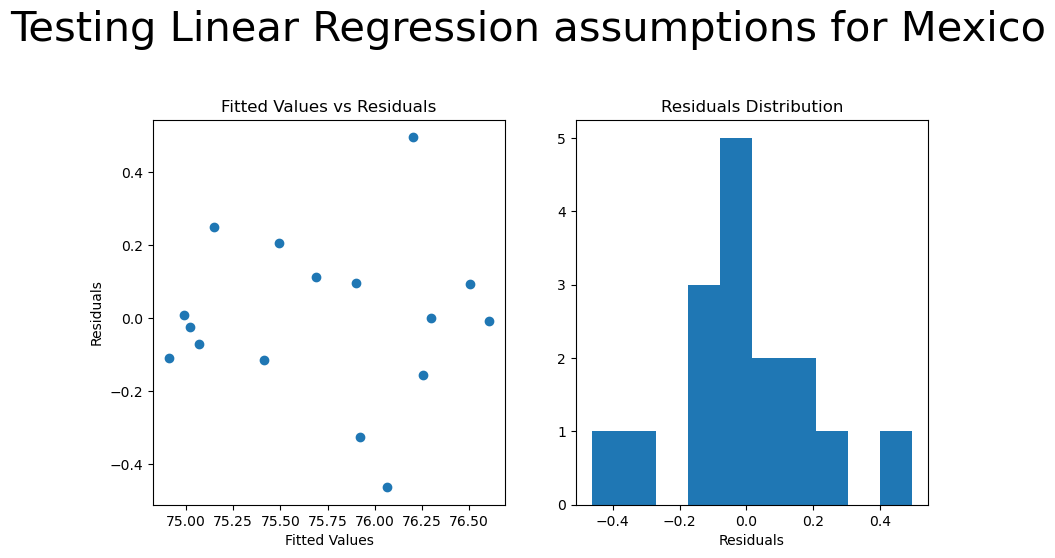

The R squared value for Mexico is 0.8690671605959653. We see that as GDP increases 1 unit per year, life expectancy will increase by 2.762337489108494e-12.


<Figure size 640x480 with 0 Axes>

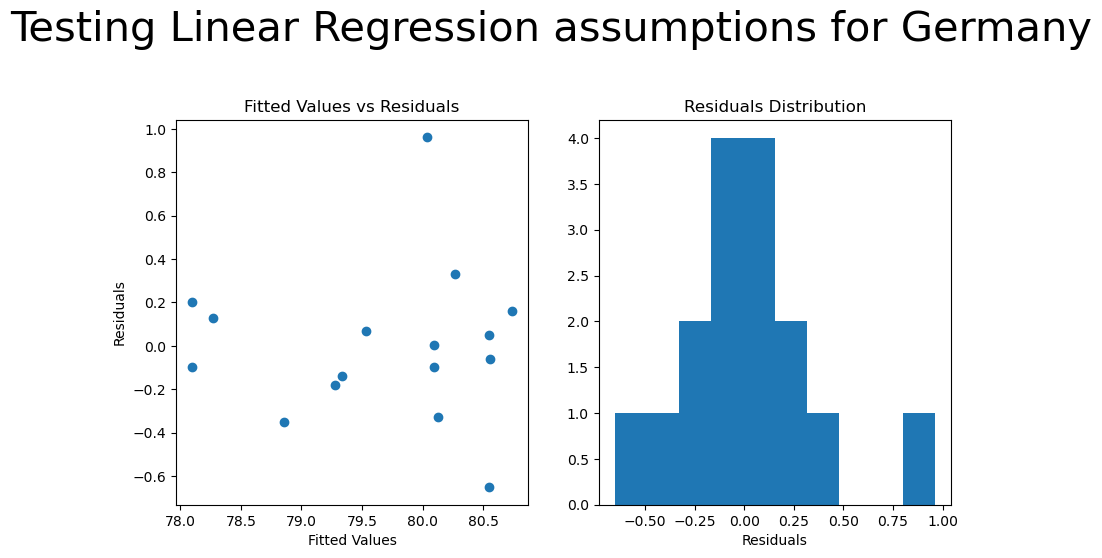

The R squared value for Germany is 0.8699272348081939. We see that as GDP increases 1 unit per year, life expectancy will increase by 1.3623972458403235e-12.


<Figure size 640x480 with 0 Axes>

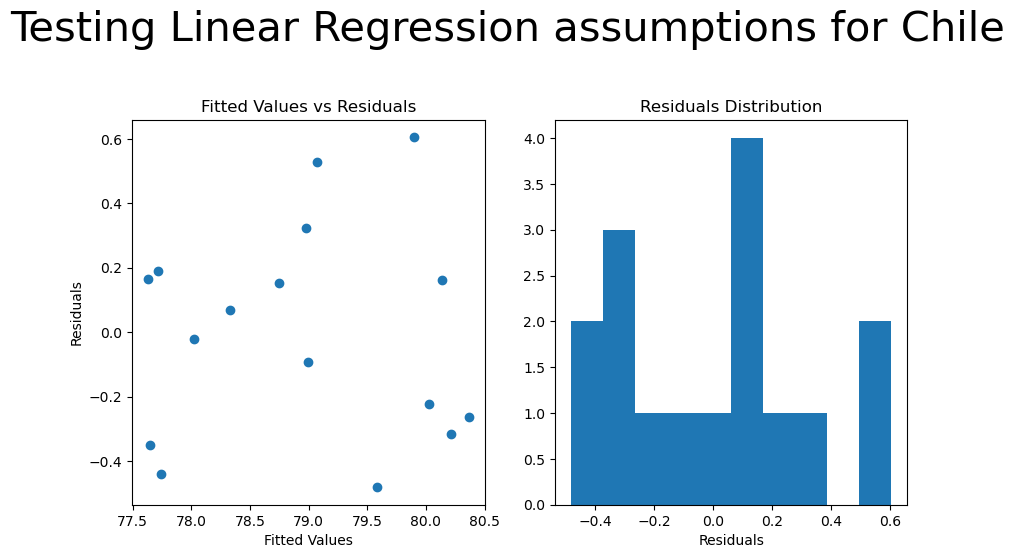

The R squared value for Chile is 0.902265680469633. We see that as GDP increases 1 unit per year, life expectancy will increase by 1.3083371929435293e-11.


<Figure size 640x480 with 0 Axes>

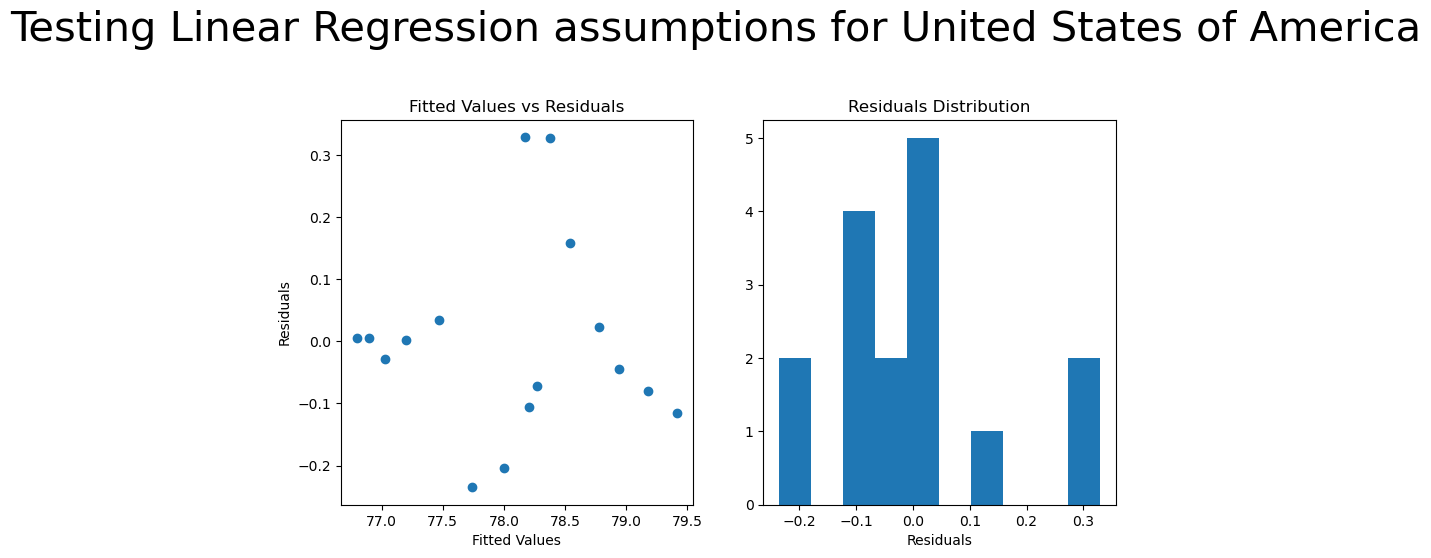

The R squared value for United States of America is 0.9637530284517015. We see that as GDP increases 1 unit per year, life expectancy will increase by 3.359806240847108e-13.


In [11]:
# linear regression model function

def linear_regression_test(country):

    linear_model = sm.OLS.from_formula('Life ~ GDP', df[df['Country'] == country]).fit()
    fitted_values = linear_model.predict(df['GDP'][df['Country'] == country])
    residual = df['Life'][df['Country'] == country] - linear_model.predict(df['GDP'][df['Country'] == country])

    plt.figure(figsize=(10,5))
    plt.subplots_adjust(hspace=0.3)
    plt.suptitle("Testing Linear Regression assumptions for {}".format(country), fontsize=30, y=1.1)
    
    plt.subplot(1,2,1)
    plt.scatter(fitted_values, residual)
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')
    plt.title('Fitted Values vs Residuals')
    
    plt.subplot(1,2,2)
    plt.hist(residual, bins = 10)
    plt.xlabel('Residuals')
    plt.title('Residuals Distribution')

    plt.savefig('Linear_Reg_test_{}.png'.format(country))
    plt.show()
    plt.clf()
    
    print('The R squared value for {country} is {r2}. We see that as GDP increases 1 unit per year, life expectancy will increase by {slope}.'.format(country = country, r2 = linear_model.rsquared, slope = linear_model.params['GDP']))

for country in list_of_countries:
    linear_regression_test(country)